# [Transformer](https://gaussian37.github.io/dl-concept-transformer/)
Pytorch에서는 `nn.TransformerEncoder`을 이용한 단일 컴포넌트를 이용하여 쉽게 Transformer 모델링을 할 수 있습니다.

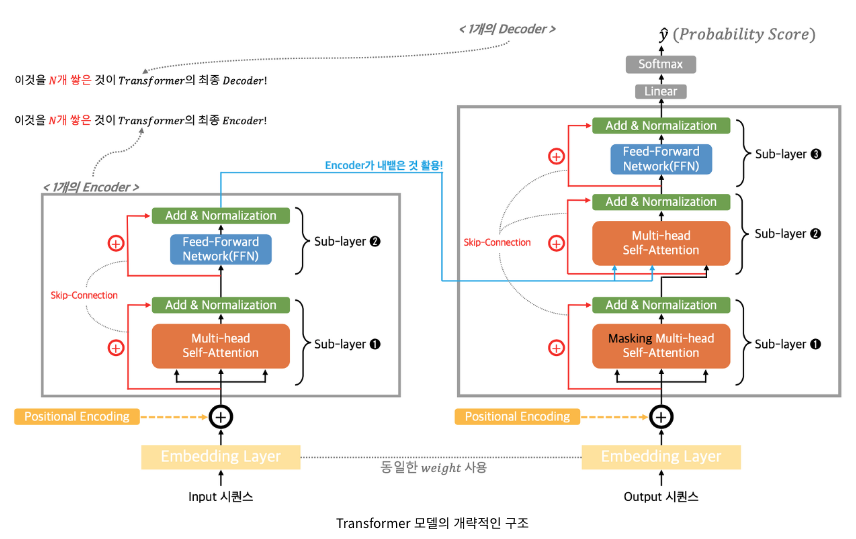

## Transformer와 Seq2Seq의 차이점

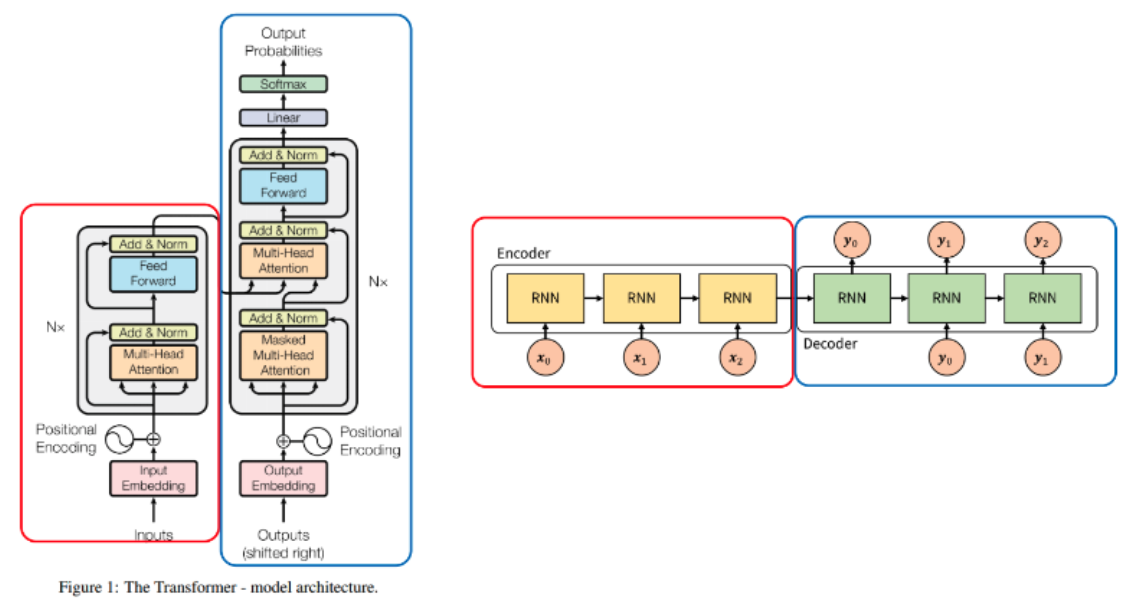

비슷한 점   
- `Seq2Seq`의 경우 Encoder(빨간색)와 Decoder(파란색) 형태로 이루어져 있고, 각 Encoder, Decoder에는 RNN을 사용하였습니다. 그리고 Encoder에서 Decoder로 정보를 전달할 때, 가운데 화살표인 context vector에 Encoder의 모든 정보를 저장하여 Decoder로 전달합니다.
- `Transformer`의 경우에도 Encoder(빨간색)와 Decoder(파란색) 형태가 있고 Encoder 끝단 부분에 Decoder로 전달되는 화살표가 있어서 Seq2Seq와 유사한 구조를 가집니다.
  
차이점
- 가장 큰 차이점은 `Seq2Seq`에서는 Encoder 연산이 끝난 후에 Decoder 연산이 시작된다면, `Transformer`는 Encoder와 Decoder가 같이 연산이 일어난다는 차이점이 있습니다.
- `Seq2Seq`에서는 Attention을 이용하기 때문에 RNN을 사용한다면, `Transformer`는 Self-Attention을 사용하기 때문에 RNN을 사용하지 않습니다.

## [Transformer 구조](https://glanceyes.com/entry/Transformer%EC%9D%98-Multi-Head-Attention%EA%B3%BC-Transformer%EC%97%90%EC%84%9C-%EC%93%B0%EC%9D%B8-%EB%8B%A4%EC%96%91%ED%95%9C-%EA%B8%B0%EB%B2%95#toc-link-1)

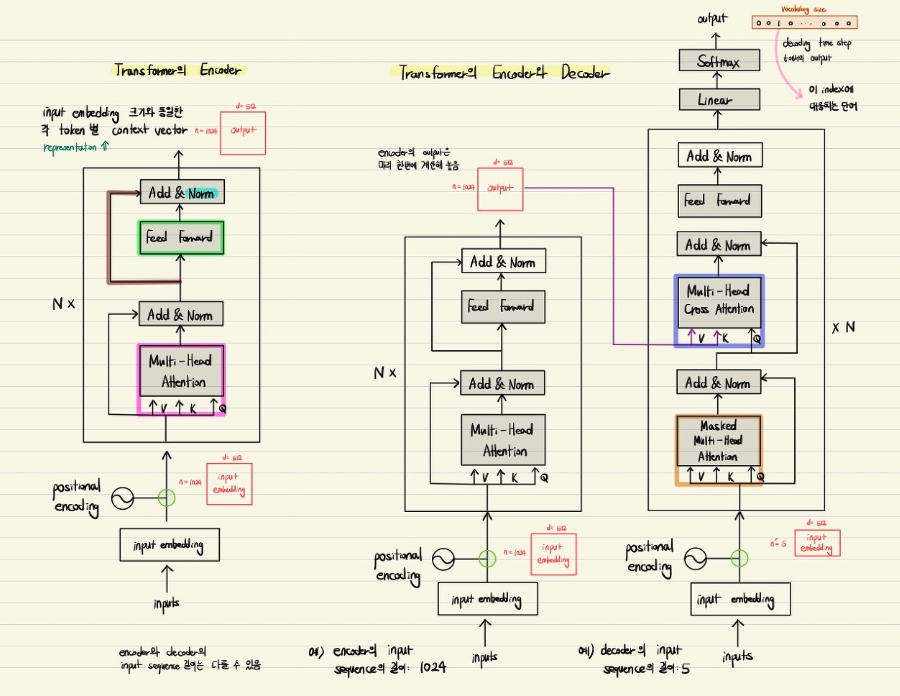

### Input, Output

- 입력
  - 각 단어는 One-hot Encoding 형태의 백터로 나타내어 집니다. 따라서 열벡터가 한 단어에 해당하며 열 벡터의 길이 즉, 행렬에서 행의 크기는 입력 단어의 가짓수와 관련이 있습니다.
  - 반면 열의 길이는 사용되는 sequence한 단어의 길이입니다. 문장에서 단어가 10개 있다면 행렬에서의 열 크기는 10이 된다고 볼 수 있습니다.

- 출력: 입력과 다르게 출력은 2가지의 Output이 표시되어 있습니다.
  - 위쪽에 있는 Output은 Transformer 모델을 통해 출력되는 실제 출력이고 아래쪽에 있는 Output은 Trnasformer에서 만들어낸 Output을 다시 입력으로 사용되는 것을 나타냅니다.
  - 다시 입력되는 Output의 첫 열벡터는 `<sos>`가 되고 X 표시가 되어있는 마지막 열벡터는 `<eos>`이므로 큰 의미는 없는 벡터입니다.
  - 따라서 shifted right라고 적힌 부분은 Output에서 하나씩 오른쪽으로 밀려서 다시 입력으로 들어가는 구조로 이해하시면 됩니다.

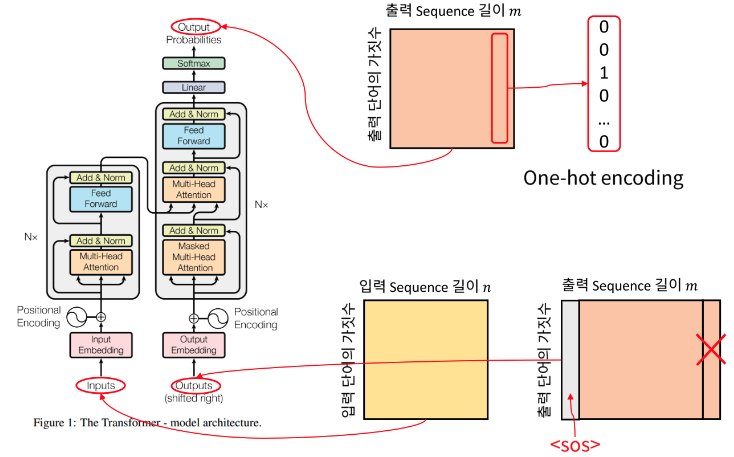

### Word Embedding

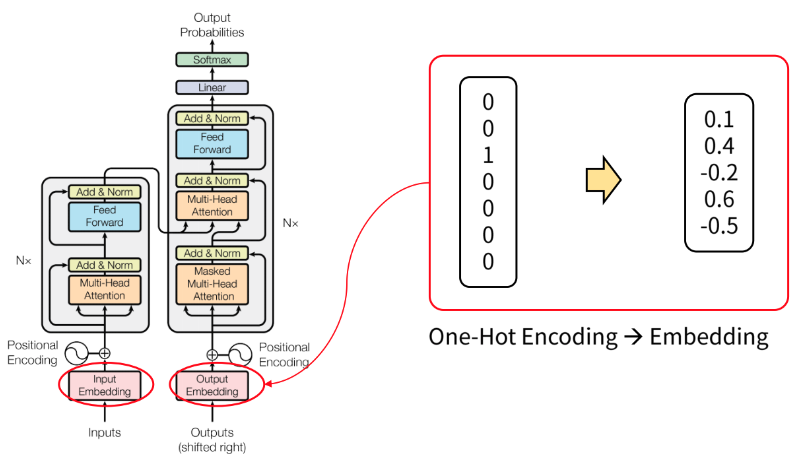

- 위 그림과 같이 one-hot encoding 벡터를 실수 형태로 변경하면 차원의 수를 줄일 수 있습니다.
- embedding의 경우 0을 기준으로 분포된 형태로 표현됩니다.

### [Positional Encoding](https://heekangpark.github.io/ml-shorts/positional-encoding-vs-positional-embedding)

#### RNN 제거

시퀀스 형태의 데이터는 각 항목의 값 뿐만 아니라 그 순서도 중요하다. "John loves Sarah"와 "Sarah loves John"은 단어는 모두 같지만 순서가 달라 의미가 다르다. 즉 시퀀스 형태의 데이터를 다루기 위해서는 순서 정보를 처리할 수 있는 모델을 사용해야 한다. RNN은 연속적으로 입력을 받아들이고 은닉 상태를 업데이트하기 때문에 시퀀스 형태의 데이터를 처리하기에 적합하다.    
  
하지만 RNN은 단점이 많은 구조이다.  
- 병렬화 문제: RNN은 그 구조상 순차적으로 입력을 처리해야 하기에 병렬화가 불가능하다. 이 때문에 대규모의 데이터셋을 이용한 학습이 불가능하다.(학습 시간이 너무 길어진다.)
- Long Distance Dependency 문제: 시퀀스에서 멀리 떨어진 항목들 간의 관계성은 `gradient vanishing/exploding` 문제로 학습이 잘 되지 않는다.

#### Positional Encoding 설명

RNN 구조에서는 순서 정보가 자연스럽게 모델에 입력됐지만, 어턴션 연산에서는 순서 정보가 고려되지 않는다. 그래서 트랜스포머 모델에서는 모델에 입력되는 입력 임베딩(input embedding)에 positional encoding이라 불리는, 입력 임베딩과 같은 차원의 위치 정보를 담고 있는 벡터를 더해준다.

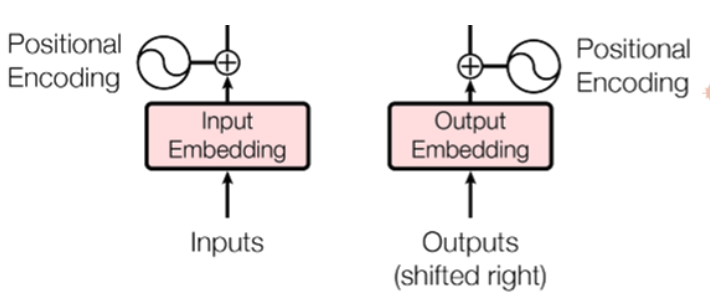

입력 임베딩의 차원이 $d$라 할 때, $p$번째 단어(token)의 positional encoding은 다음 식을 이용해 계산된다.  

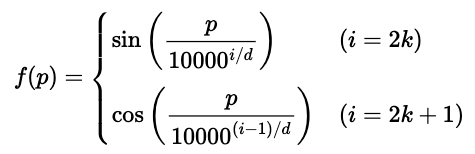

### [Self-Attention](https://techblog-history-younghunjo1.tistory.com/496)

`Transformer 모델`은 일반 `Attention`이 아닌 `Self-Attention` 기법을 사용합니다.

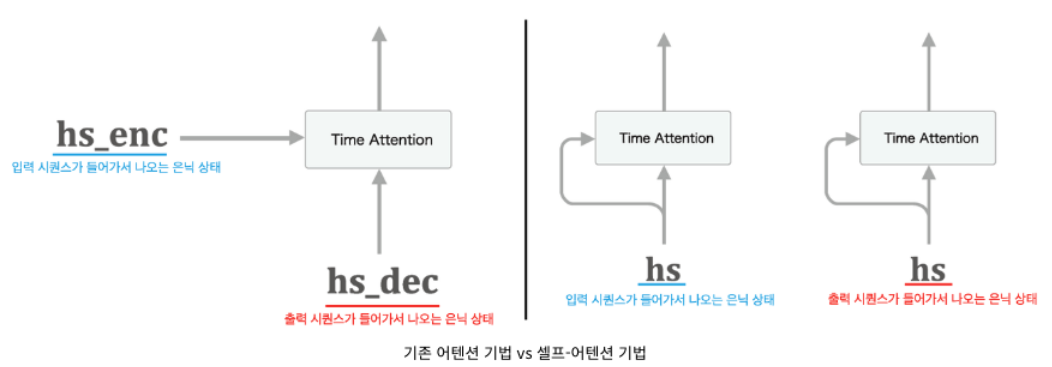

위의 이미지와 같이 기존 `Attention` 기법은 입력-출력 간에 대응되는 단어 관계를 파악하는 게 핵심이었다. 하지만 `Self-Attention` 기법은 입력, 출력 각 시퀀스 내부의 단어들 간의 대응 관계를 파악하는 것이 핵심이다. 아래 이미지처럼 기법의 차이가 난다.

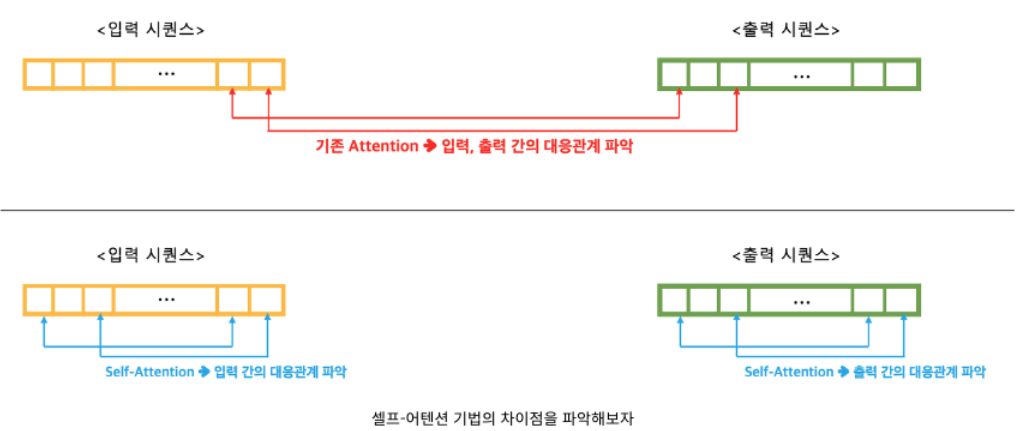

`Self-Attention` 기법은 입력 시퀀스 내에서의 대응관계를 학습하고 동시에 출력 시퀀스 내에서의 대응관계도 학습하는 방법이다.     
그리고 이러한 `Self-Attention` 기법을 사용해 만든 계층을 재귀적으로 쌓아서 기존 Seq2Seq2 모델의 RNN이 하던 (과거의 기억을 유지하는) 메모리 네트워크 역할을 대체하기도 한다.  

#### [Seq2Seq with Attention](https://glanceyes.tistory.com/entry/Attention-%EA%B8%B0%EB%B2%95%EC%9D%84-%EC%82%AC%EC%9A%A9%ED%95%9C-Seq2Seq-with-attention)

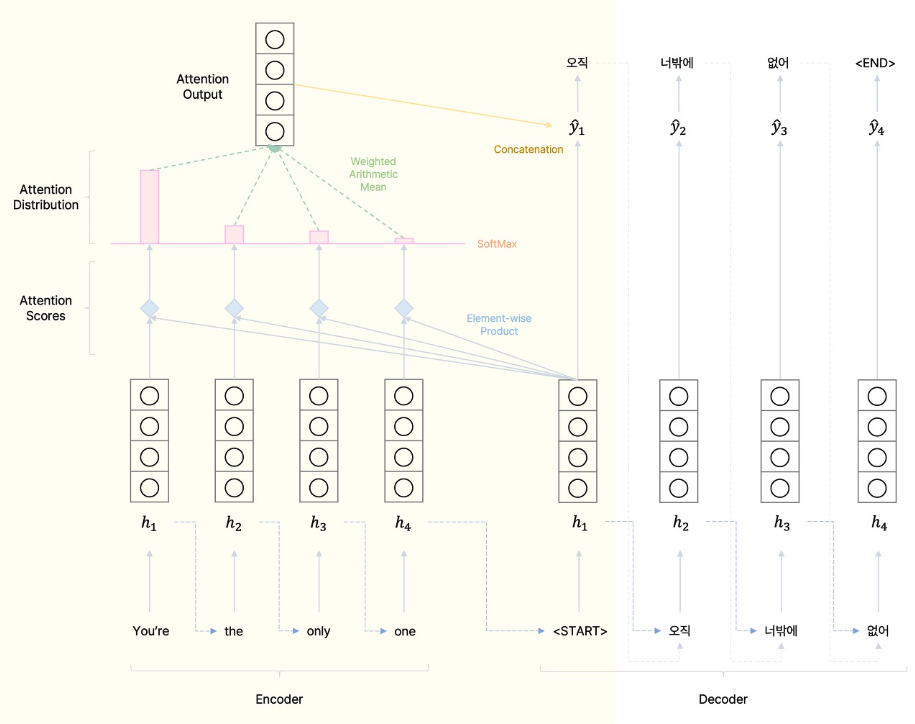

#### [self-attention의 학습과정](https://glanceyes.tistory.com/entry/Transformer%EC%9D%98-%ED%95%99%EC%8A%B5-%EA%B3%BC%EC%A0%95%EA%B3%BC-Seq2Seq-with-Attention-%EB%AA%A8%EB%8D%B8%EA%B3%BC%EC%9D%98-%EB%B9%84%EA%B5%90)

- 주어진 입력 벡터에 관해 어떠한 벡터를 중요하게 선별하여 반영할지에 관한 그 기준이 되는 벡터로 사용되는데, transformer에서는 여기서 각 단어에 대응되는 `query vector`를 만들어 사용한다.

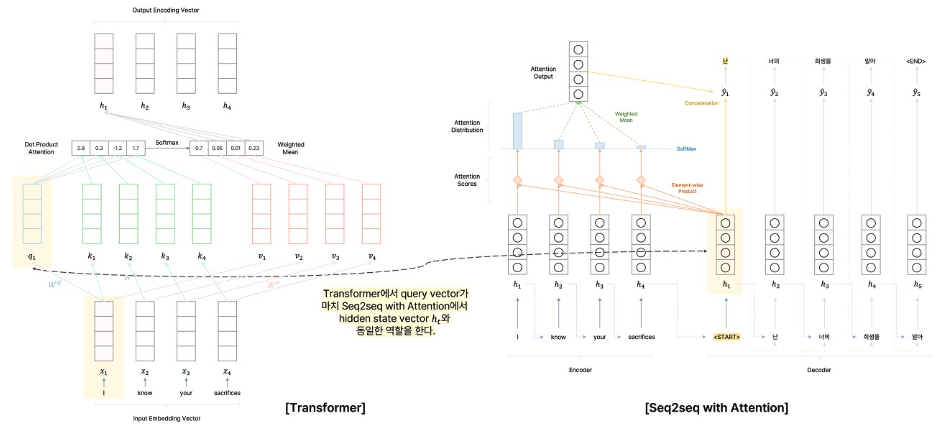

- 또한 attention 모듈에서 query vector와의 유사도를 구할 때 언급한 각 단어의 input vector를 그대로 사용하지 않고 각 단어마다 `key vector`라는 별개의 vector를 만들어 사용한다.

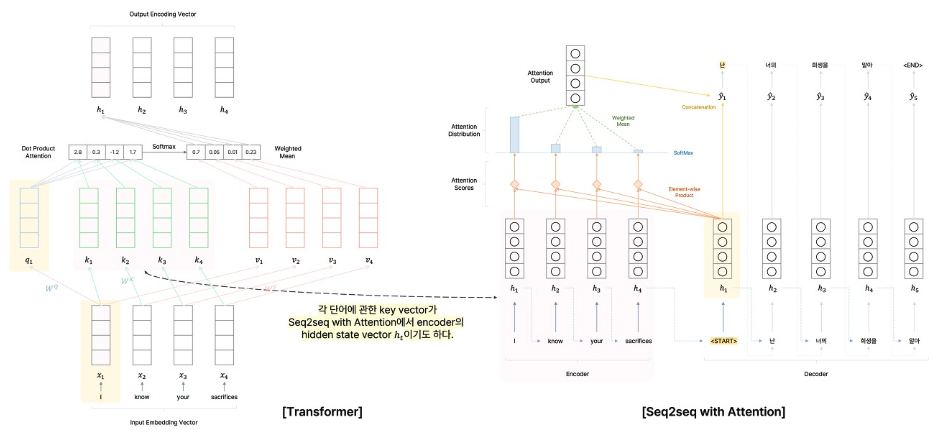

- Transformer에서는 Attention 모듈에서와는 달리 가중 평균을 구할 때 각 단어별로 임베딩된 input vector를 그대로 사용하지 않고 각 단어별 `value vector`를 사용한다.

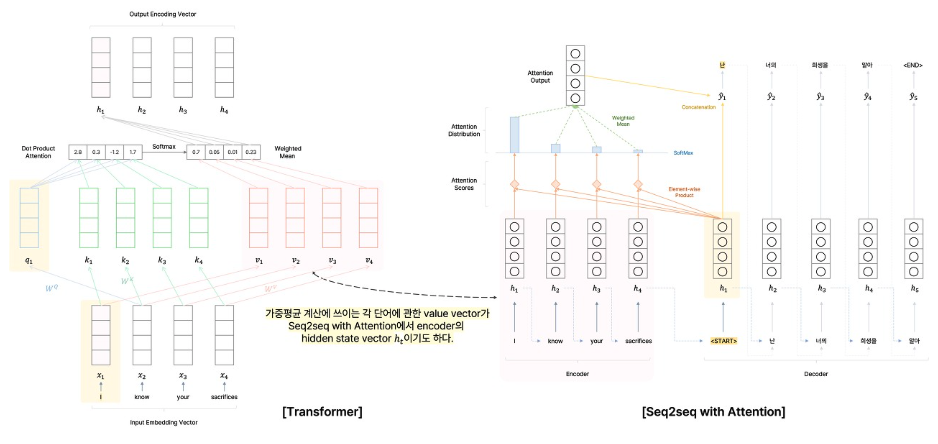

### [Multi-Head Attention](https://codingopera.tistory.com/44)

- 일반적인 Attention:    
예를 들어 [4x4] 크기의 문장 임베딩 벡터와 [4x8]의 Query, Key, Value가 있을 때, 일반적인 한 번에 계산하는 Attention 메커니즘은 [4x4]*[4x8]=[4x8]의 Attention Value가 한 번에 도출됩니다.

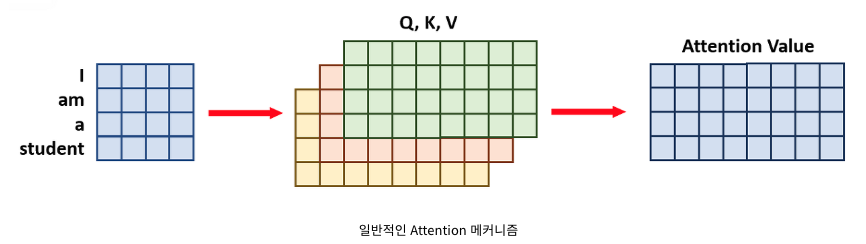

- Multi-head Attention:     
 - head의 수가 4개이므로 각 연산과정이 4분의 1만큼만 필요하다는 이야기입니다.
 - 때문에 위에서 크기가 [4x8]이었던 Query, Key, Value를 4 등분하여 [4x2]로 만듭니다.
 - 이렇게 되면 자연스럽게 각 Attention Value는 [4x2]가 됩니다.
 - 이 Attention Value들을 마지막에 concatenate를 시켜주면 위 그림과 같이 크기가 [4x8]이 되어 일반적인 Attention 메커니즘의 결괏값과 동일하게 됩니다.

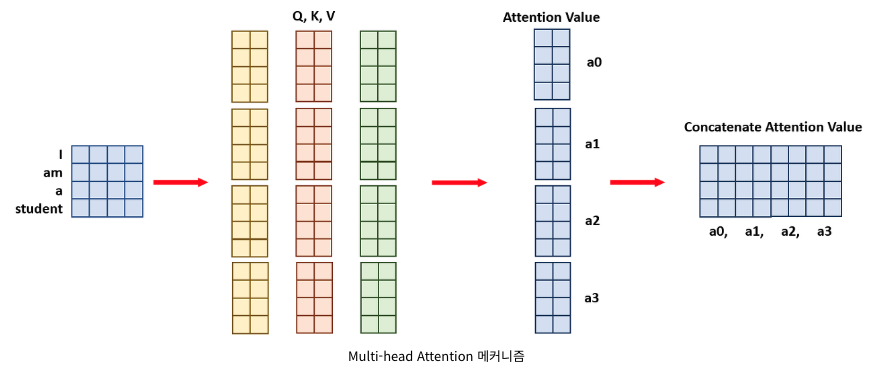

#### Multi-Head Attention 장점
- 어떤 동일한 sequence가 주어졌을 때도 특정한 query word에 관해 서로 다른 기준으로 여러 관점에서의 정보를 뽑아와야 할 필요성이 있다. 예를 들어, 문장에서 어떤 주어가 되는 대상이 한 행동 중심의 정보를 뽑아와야 할 뿐더러, 주체가 있는 장소에 관한 정보도 뽑아 올 필요가 있다.
- 그런데 기존의 One-Head Attention 기법은 어떤 한 단어가 다른 단어와 상호작용하는 정보를 한 가지 방법으로 뽑아올 수 밖에 없다. 그래서 head를 여러 개 두어서 좀 더 다양한 관점에서의 정보를 얻는 과정을 병렬적으로 수행하고자 하는 목적에서 Multi-Head Attention이 사용된다.

### [Masked Multi-Head Attention](https://glanceyes.com/entry/Transformer%EC%9D%98-Multi-Head-Attention%EA%B3%BC-Transformer%EC%97%90%EC%84%9C-%EC%93%B0%EC%9D%B8-%EB%8B%A4%EC%96%91%ED%95%9C-%EA%B8%B0%EB%B2%95#toc-link-20)

- Decoder에서 ground truth 문장의 각 단어에 관해 query, key, value vector를 만들어서 각 단어별 encoding vector를 만들고자 할 때, 앞에서 등장한 단어가 뒤에서 등장한 단어에 관해 가중치를 부여하여 파라미터 업데이트에 반영하는 경우가 과연 옳은 것인지를 고민해 볼 필요가 있다.
  - 예를 들어, token은 그 이후에 등장하는 단어 정보에 관해 인코딩된 벡터를 생성하게 되면 이는 결과적으로 앞 단어의 인코딩 벡터가 뒤의 단어의 정보도 반영하게 되는 현상이 발생한다.
- 이러한 문제 발생을 막고자 query와 key vector 간의 내적을 통해 attention score를 구한 후 해당 index 단어의 뒤에 등장하는 단어와의 attention score는 0으로 만들어서 후처리하는 것이 바로 Masked Multi-Head Attention의 핵심이다. 이는 앞에 등장하는 단어를 인코딩할 때 뒤에 등장하는 단어의 정보를 반영하지 못하도록 정보의 접근 권한을 차단하는 역할을 한다고 볼 수 있다.

요약하자면, masking은 self-attention 수행 시 행렬 Q와 K를 곱한 결과인 가중치 행렬에 적용하는데, 이는 self-attention 수행 시 앞 단어를 예측할 때 뒤쪽의 정보가 반영되는 것을 사전에 차단하기 위한 용도이다.

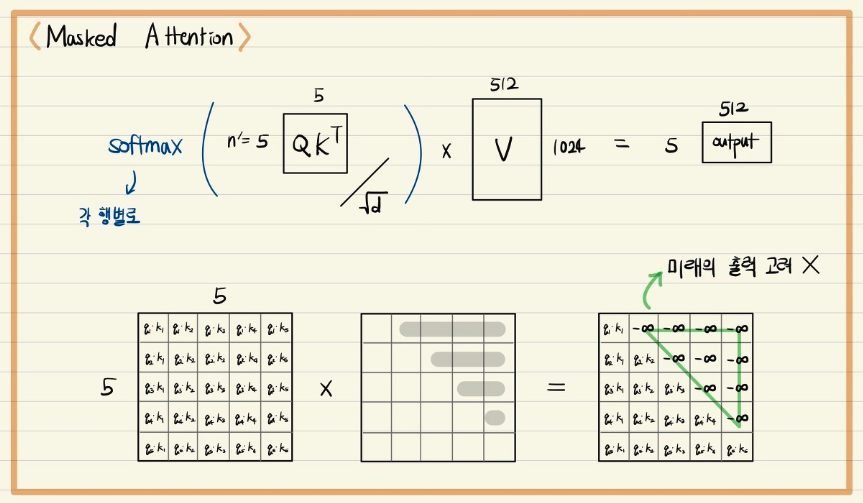

### [Multi-Head Cross Attention](https://glanceyes.com/entry/Transformer%EC%9D%98-Multi-Head-Attention%EA%B3%BC-Transformer%EC%97%90%EC%84%9C-%EC%93%B0%EC%9D%B8-%EB%8B%A4%EC%96%91%ED%95%9C-%EA%B8%B0%EB%B2%95#toc-link-21)

- 나아가 마찬가지로 Multi-Head Attention과 residual connection, layer normalization을 한 번 더 거치는데, 여기서는 encoder에서 각 단어별로 최종 인코딩된 벡터를 key와 value vector로 사용하고, query vector로는 decoder의 앞단에서 인코딩된 단어별 벡터를 사용한다.
- 이는 ground truth의 각 단어들이 encoder의 입력으로 주어지는 입력 문장에서 어떠한 단어에 더 주목할지를 구하고, ground truth 문장의 각 단어를 인코딩할 때 encoder의 입력 문장에서 어떠한 단어의 인코딩 벡터를 더 많이 반영할지를 가중 평균 구하는 것으로 해석할 수 있다.
- 마찬가지로 이를 Seq2Seq with Attention와 대응시켜면, decoder에서 각 단어에 해당되는 매 time step마다 hidden state를 가지고 encoder에서의 모든 hidden state와 attention score를 구한 후 가중 평균을 계산하여 decoder에서 해당 time step에서의 최종 인코딩된 hidden state vector를 구하는 과정으로 볼 수 있다.

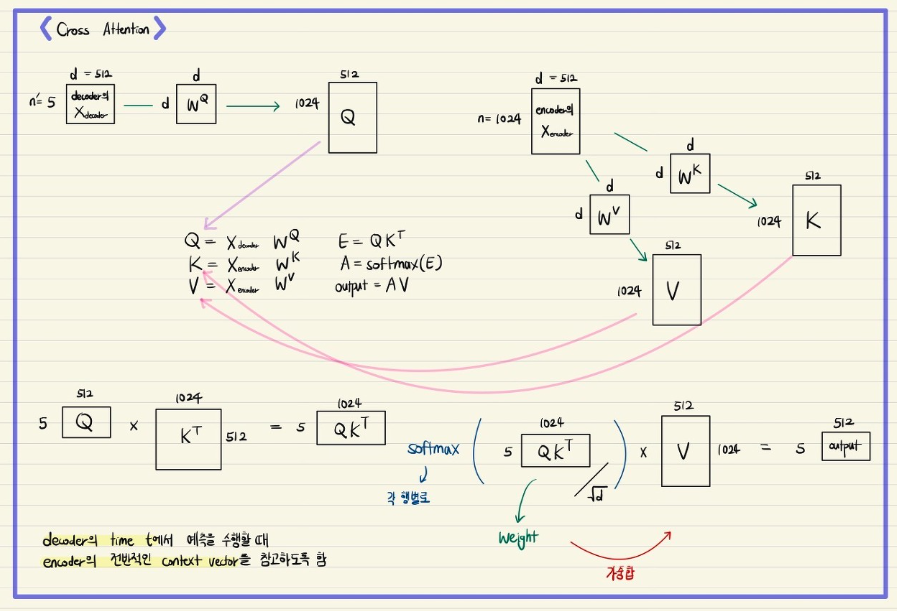

### Position-wise Feed-Forward Network(FFN)

Position wise Feed Forward는 단어의 Position 별로 Feed Forward 한다는 뜻입니다. 각 단어에 해당하는 열 벡터가 입력으로 들어갔을 때, `FC Layer -> Relu -> FC Layer` 연산을 거치게 됩니다.

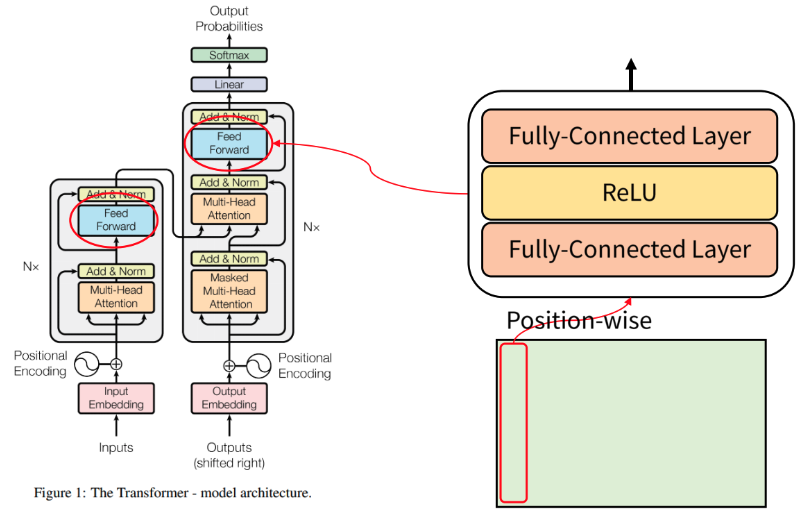

### Add, Norm

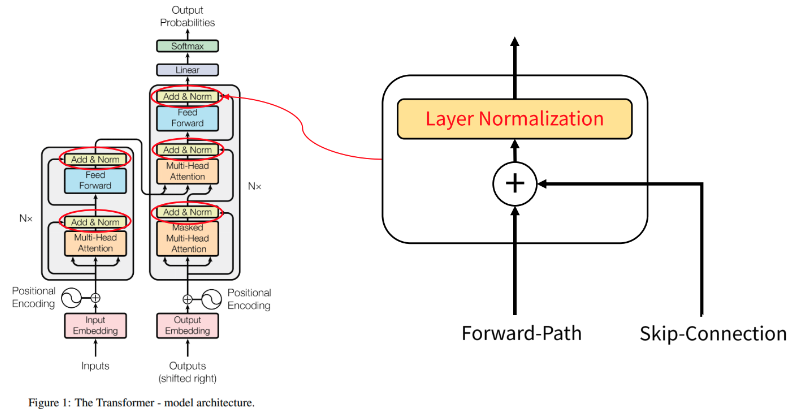

- [Skip Connection](https://techblog-history-younghunjo1.tistory.com/279)
  - Add는 Skip(Residual) Connection을 의미한다.  
  - Skip Connection을 사용하는 이유는 '덧셈' 연산의 역전파 시 기울기를 건드리지 않고 그대로 흘려보내는 특성 때문에 `기울기 소실, 폭발 문제를 막을 수 있기 때문이다.`
- Norm(Normalization)
  - 출력값들의 분포를 인위적으로 표준정규분포 형태로 만들어 주는 것이다.

### Output Softmax

- 마지막 Feed Forward를 통해 출력이 되면 Linear 연산을 통하여 출력 단어 종류 갯수로 출력 사이즈를 맞춰 줍니다.  
- 최종적으로 Softmax를 이용해 어떤 단어인지 Classification 문제를 해결할 수 있습니다.

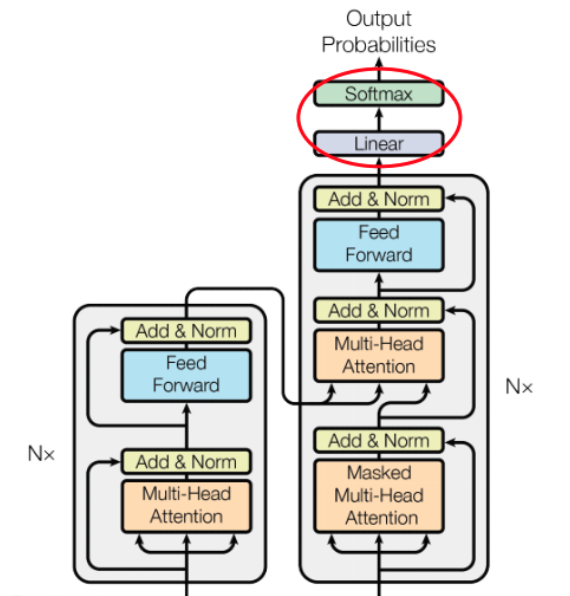

## [Transformer를 사용하는 것이 항상 좋을까?](https://glanceyes.com/entry/Transformer%EB%A5%BC-%EC%82%AC%EC%9A%A9%ED%95%98%EB%8A%94-%EA%B2%83%EC%9D%B4-%ED%95%AD%EC%83%81-%EC%A2%8B%EC%9D%84%EA%B9%8C)
- Transformer는 다양한 sequence data에 있어서 강점을 보이지만, self-attention을 수행하는 과정에서 다른 모델에 비해 상대적으로 많은 양의 데이터와 연산량을 요구한다.
- 그래서 어떠한 케이스에 상관없이 무조건적으로 Transformer를 택하여 사용하는 건 바람직하지 않을 수 있고, 사용자가 고려하는 목표와 주어진 환경을 종합적으로 고려할 필요가 있다.

### Transformer 사용을 피해야 하는 경우
- Feature를 가지고 하나의 Sequence로 만드는 것이 어려운 경우
  - 예를 들어, 주어진 데이터의 feature의 순서가 중요하지 않아서 이를 하나의 sequence로 묶기 어려운 경우가 존재한다.
  - 이때 feature 사이에 관계를 찾는 것이 어려워서 Transformer의 입력 데이터를 어떻게 만들어서 주는 것이 효율적인지 답을 찾기 힘들 수 있다.
- Feature와 Label의 수가 데이터에 비해 너무 많은 경우
  - 또한 feature의 수와 예측해야 하는 label의 수가 너무 많은 데 반해 학습으로 주어지는 데이터의 양이 많지 않으면 Transformer가 오히려 더 불리할 수 있다.
- Sequence 길이가 너무 긴 경우
  - Sequence의 길이가 길어지면 Transformer의 Self-attention을 사용하는 과정에서 데이터의 양이 증가함에 따라 시간복잡도(time complexity)가 증가한다는 단점이 있다.

### [Transformer를 사용하지 않은 경진대회](https://www.kaggle.com/c/lish-moa/discussion/202256)
MoA는 약물을 투여했을 때 데이터의 여러 특징에 따라 200여 개의 화학 반응 중 어떤 반응이 나타날지를 예측하는 task를 수행해야 하는데, 다음과 같은 한계로 인해 Transformer가 제대로 작동하지 않았다고 한다.


- 주어진 데이터를 Sequence로 묶기가 어렵다.
  - 학습 데이터에서 사람에게 투여한 약물에 관한 정보와 그 약을 투여 받은 사람의 정보를 같이 학습하는데, 이 둘 사이의 정보는 사실상 연관관계가 없다. 앞서 설명한 분자의 예시에서는 분자를 구성하는 임의의 두 원자 각각의 정보와 두 원자가 어떻게 결합했는지에 관한 정보는 서로 연관되어 분자를 대표한다고 볼 수 있지만, 이 대회에서는 약물 정보와 약물을 투여 받은 사람의 정보를 연관짓기에는 어려움이 존재한다.
- Feature의 수가 너무 많다.
  - 학습할 데이터의 feature 수가 875개에 달하는데, 이는 약 24,000개의 데이터에 비해 데이터를 표현하는 feature의 수가 너무 많아 과적합 문제를 발생할 가능성이 있다.
- 데이터에 비해 예측해야 할 클래스가 많다.
  - 어떤 반응이 나타나는지를 예측해야 하는 클래스 수가 207개였는데, 이 또한 클래스를 매우 세분화하여 예측해야 하므로 학습이 제대로 되지 않거나 또는 과적합이 이루어질 가능성이 있다.

그래서 이 대회에서 좋은 성적을 보인 아래의 solution에서는 1D-CNN을 사용하는 방법을 택했다.

# [예제1](https://wikidocs.net/156986)

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim

import math
import numpy as np
import pandas as pd
import random
import re

from torch.utils.data import DataLoader, Dataset

## [nn.Transformer](https://pytorch.org/docs/stable/generated/torch.nn.Transformer.html#transformer)
트랜스포머 모델의 주요 파라메터는 다음과 같습니다.
- `d_model`: 트랜스포머의 인코더와 디코더에서의 정해진 입력과 출력의 크기를 의미합니다. (default=512)
- `num_encoder_layers`: 트랜스포머 모델에서 인코더가 총 몇 층으로 구성되었는지를 의미합니다. (default=6)
- `num_decoder_layers`: 트랜스포머 모델에서 디코더가 총 몇 층으로 구성되었는지를 의미합니다. (default=6)
- `nhead`: 멀티헤드 어텐션 모델의 헤드 수, 어텐션을 사용할 때 여러 개로 분할해서 병렬로 어텐션을 수행하고 결과값을 다시 하나로 합치는 방식에서 병렬의 수 (default=8)
- `dim_feedforward`: feedforward network model 의 차원, 피드 포워드 신경망의 은닉층의 크기(default=2048).

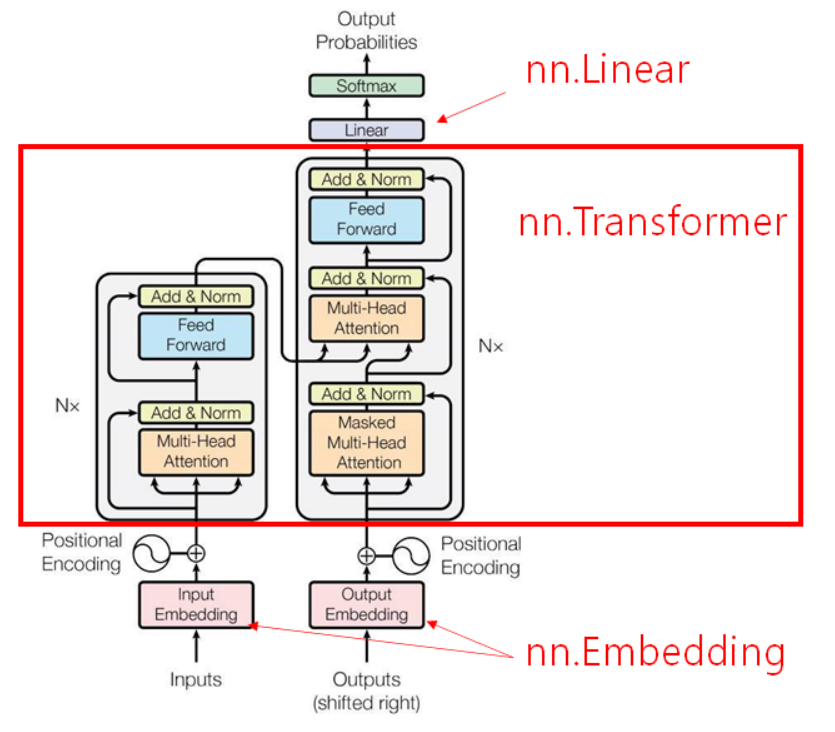

In [2]:
transformer_model = nn.Transformer(nhead=16, num_encoder_layers=12)
transformer_model

Transformer(
  (encoder): TransformerEncoder(
    (layers): ModuleList(
      (0-11): 12 x TransformerEncoderLayer(
        (self_attn): MultiheadAttention(
          (out_proj): NonDynamicallyQuantizableLinear(in_features=512, out_features=512, bias=True)
        )
        (linear1): Linear(in_features=512, out_features=2048, bias=True)
        (dropout): Dropout(p=0.1, inplace=False)
        (linear2): Linear(in_features=2048, out_features=512, bias=True)
        (norm1): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
        (norm2): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
        (dropout1): Dropout(p=0.1, inplace=False)
        (dropout2): Dropout(p=0.1, inplace=False)
      )
    )
    (norm): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
  )
  (decoder): TransformerDecoder(
    (layers): ModuleList(
      (0-5): 6 x TransformerDecoderLayer(
        (self_attn): MultiheadAttention(
          (out_proj): NonDynamicallyQuantizableLinear(in_features=512,

In [3]:
src = torch.rand((10, 32, 512)) # src: source data
tgt = torch.rand((20, 32, 512)) # tgt: target data

src.shape, tgt.shape

(torch.Size([10, 32, 512]), torch.Size([20, 32, 512]))

In [4]:
out = transformer_model(src, tgt)

out.shape

torch.Size([20, 32, 512])

## Model

### Positional Encoding
- PositionalEncoding 모듈은 시퀀스 안에서 토큰의 상대적인 또는 절대적인 위치에 대한 어떤 정보를 주입합니다.
- 여기에서, 우리는 다른 주파수(frequency) 의 sine 과 cosine 함수를 사용합니다.





In [5]:
class PositionalEncoding(nn.Module):
    def __init__(self, dim_model, dropout_p, max_len):
        super().__init__()
        # 드롭 아웃
        self.dropout = nn.Dropout(dropout_p)

        # Encoding - From formula
        pos_encoding = torch.zeros(max_len, dim_model)
        positions_list = torch.arange(0, max_len, dtype=torch.float).view(-1, 1) # 0, 1, 2, 3, 4, 5
        division_term = torch.exp(torch.arange(0, dim_model, 2).float() * (-math.log(10000.0)) / dim_model) # 1000^(2i/dim_model)

        pos_encoding[:, 0::2] = torch.sin(positions_list * division_term)
        pos_encoding[:, 1::2] = torch.cos(positions_list * division_term)

        # Saving buffer (same as parameter without gradients needed)
        pos_encoding = pos_encoding.unsqueeze(0).transpose(0, 1)
        self.register_buffer("pos_encoding",pos_encoding)

    def forward(self, token_embedding: torch.tensor) -> torch.tensor:

        # Residual connection + pos encoding
        return self.dropout(token_embedding + self.pos_encoding[:token_embedding.size(0), :])


### Transformer Model
- d_model - 트랜스포머의 인코더와 디코더에서의 정해진 입력과 출력의 크기를 의미합니다. (default=512)
- num_encoder_layers - 트랜스포머 모델에서 인코더가 총 몇 층으로 구성되었는지를 의미합니다. (default=6)
- num_decoder_layers - 트랜스포머 모델에서 디코더가 총 몇 층으로 구성되었는지를 의미합니다. (default=6)
- nhead – 멀티헤드 어텐션 모델의 헤드 수, 어텐션을 사용할 때 여러 개로 분할해서 병렬로 어텐션을 수행하고 결과값을 다시 하나로 합치는 방식에서 병렬의 수 (default=8)
- dim_feedforward – feedforward network model 의 차원, 피드 포워드 신경망의 은닉층의 크기(default=2048).

#### Target Masking
모델 구조를 자세히 보면 "Masked Multi-head Attention" 이라는 특수 블록이 있다는 것을 기억할 수 있습니다 .

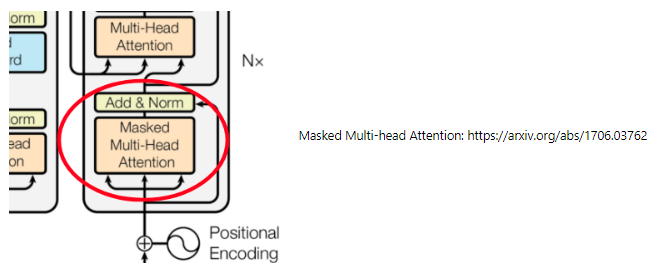

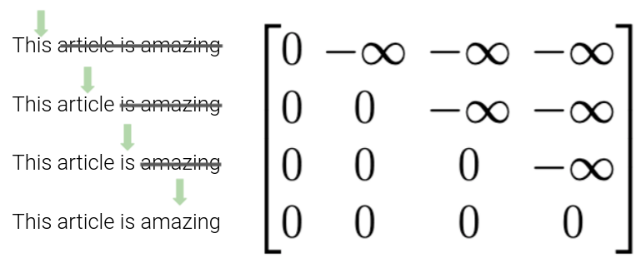

#### Padding Masking
- 텐서는 GPU에 저장할 수 있는 행렬이기 때문에 모든 차원이 같은 크기의 요소를 가져야 합니다.
- 그러나 자연어처리나 다른 크기의 이미지 처리와 같은 작업을 할 때는 동일한 차원이 아니게 됩니다.
- 따라서 우리는 " 특수 토큰 "을 사용하여 문장의 시작 위치(), 문장 끝 위치() 및 나머지 공간을 채우기 위한 토큰() 을 사용 해야 합니다.

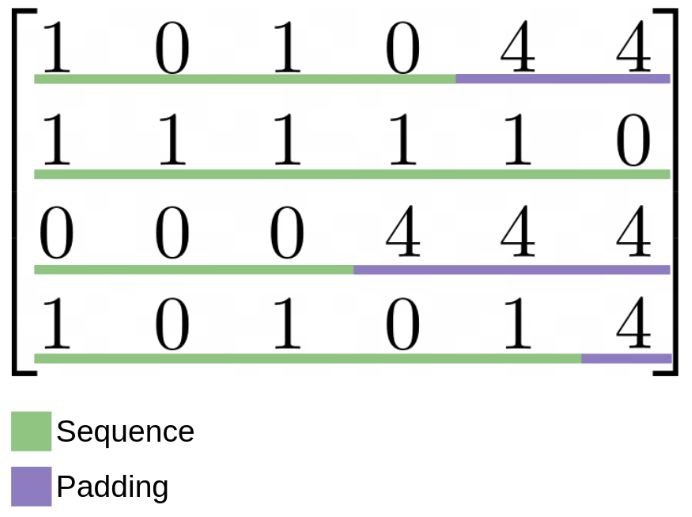

### Model 생성

In [6]:
class Transformer(nn.Module):
    # Constructor
    def __init__( self, num_tokens, dim_model, num_heads, num_encoder_layers, num_decoder_layers, dropout_p, ):
        super().__init__()

        # INFO
        self.model_type = "Transformer"
        self.dim_model = dim_model

        # LAYERS
        self.embedding = nn.Embedding(num_tokens, dim_model)
        self.positional_encoder = PositionalEncoding(dim_model=dim_model, dropout_p=dropout_p, max_len=5000)
        self.transformer = nn.Transformer(
            d_model=dim_model,
            nhead=num_heads,
            num_encoder_layers=num_encoder_layers,
            num_decoder_layers=num_decoder_layers,
            dropout=dropout_p,
        )
        self.out = nn.Linear(dim_model, num_tokens)

    def forward(self, src, tgt, tgt_mask=None, src_pad_mask=None, tgt_pad_mask=None):
        # Src, Tgt size 는 반드시 (batch_size, src sequence length) 여야 합니다.

        # Embedding + positional encoding - Out size = (batch_size, sequence length, dim_model)
        src = self.embedding(src) * math.sqrt(self.dim_model)
        tgt = self.embedding(tgt) * math.sqrt(self.dim_model)
        src = self.positional_encoder(src)
        tgt = self.positional_encoder(tgt)

        src = src.permute(1,0,2)
        tgt = tgt.permute(1,0,2)

        # Transformer blocks - Out size = (sequence length, batch_size, num_tokens)
        transformer_out = self.transformer(src, tgt, tgt_mask=tgt_mask, src_key_padding_mask=src_pad_mask, tgt_key_padding_mask=tgt_pad_mask)
        out = self.out(transformer_out)

        return out

    def get_tgt_mask(self, size) -> torch.tensor:
        mask = torch.tril(torch.ones(size, size) == 1) # Lower triangular matrix
        mask = mask.float()
        mask = mask.masked_fill(mask == 0, float('-inf')) # Convert zeros to -inf
        mask = mask.masked_fill(mask == 1, float(0.0)) # Convert ones to 0

        return mask

    def create_pad_mask(self, matrix: torch.tensor, pad_token: int) -> torch.tensor:
        return (matrix == pad_token)


## Data

In [7]:
def generate_random_data(n):
    SOS_token = np.array([2])
    EOS_token = np.array([3])
    length = 8

    data = []

    # 1,1,1,1,1,1 -> 1,1,1,1,1
    for i in range(n // 3):
        X = np.concatenate((SOS_token, np.ones(length), EOS_token))
        y = np.concatenate((SOS_token, np.ones(length), EOS_token))
        data.append([X, y])

    # 0,0,0,0 -> 0,0,0,0
    for i in range(n // 3):
        X = np.concatenate((SOS_token, np.zeros(length), EOS_token))
        y = np.concatenate((SOS_token, np.zeros(length), EOS_token))
        data.append([X, y])

    # 1,0,1,0 -> 1,0,1,0,1
    for i in range(n // 3):
        X = np.zeros(length)
        start = random.randint(0, 1)

        X[start::2] = 1

        y = np.zeros(length)
        if X[-1] == 0:
            y[::2] = 1
        else:
            y[1::2] = 1

        X = np.concatenate((SOS_token, X, EOS_token))
        y = np.concatenate((SOS_token, y, EOS_token))
        data.append([X, y])

    np.random.shuffle(data)

    return data

In [8]:
#크기가 16인 배치 형태로 만들어 줍니다.
def batchify_data(data, batch_size=16, padding=False, padding_token=-1):
    batches = []
    for idx in range(0, len(data), batch_size):
        # batch_size 크기가 아닌 경우 마지막 비트를 얻지 않도록 합니다.
        if idx + batch_size < len(data):
            # 여기서 배치의 최대 길이를 가져와 PAD 토큰으로 길이를 정규화해야 합니다.
            if padding:
                max_batch_length = 0
                # batch에서 가장 긴 문장 가져오기
                for seq in data[idx : idx + batch_size]:
                    if len(seq) > max_batch_length:
                        max_batch_length = len(seq)

                # 최대 길이에 도달할 때까지 X 패딩 토큰을 추가합니다.
                for seq_idx in range(batch_size):
                    remaining_length = max_batch_length - len(data[idx + seq_idx])
                    data[idx + seq_idx] += [padding_token] * remaining_length

            batches.append(np.array(data[idx : idx + batch_size]).astype(np.int64))

    print(f"{len(batches)} batches of size {batch_size}")

    return batches

In [9]:
train_data = generate_random_data(9000)
val_data = generate_random_data(3000)

len(train_data), len(val_data)

(9000, 3000)

In [10]:
train_data[:3]

[[array([2., 1., 1., 1., 1., 1., 1., 1., 1., 3.]),
  array([2., 1., 1., 1., 1., 1., 1., 1., 1., 3.])],
 [array([2., 0., 1., 0., 1., 0., 1., 0., 1., 3.]),
  array([2., 0., 1., 0., 1., 0., 1., 0., 1., 3.])],
 [array([2., 1., 1., 1., 1., 1., 1., 1., 1., 3.]),
  array([2., 1., 1., 1., 1., 1., 1., 1., 1., 3.])]]

In [11]:
train_data[0][0].shape

(10,)

In [12]:
val_data[:3]

[[array([2., 0., 0., 0., 0., 0., 0., 0., 0., 3.]),
  array([2., 0., 0., 0., 0., 0., 0., 0., 0., 3.])],
 [array([2., 0., 1., 0., 1., 0., 1., 0., 1., 3.]),
  array([2., 0., 1., 0., 1., 0., 1., 0., 1., 3.])],
 [array([2., 0., 1., 0., 1., 0., 1., 0., 1., 3.]),
  array([2., 0., 1., 0., 1., 0., 1., 0., 1., 3.])]]

In [13]:
val_data[0][0].shape

(10,)

In [14]:
train_dataloader = batchify_data(train_data)
val_dataloader = batchify_data(val_data)

len(train_dataloader), len(val_dataloader)

562 batches of size 16
187 batches of size 16


(562, 187)

In [15]:
train_dataloader[0].shape

(16, 2, 10)

In [16]:
val_dataloader[0].shape

(16, 2, 10)

## Training

In [17]:
def train_loop(model, opt, loss_fn, dataloader):
    model.train()
    total_loss = 0

    for batch in dataloader:
        X, y = batch[:, 0], batch[:, 1]
        X, y = torch.tensor(X).to(device), torch.tensor(y).to(device)

        # 이제 tgt를 1만큼 이동하여 <SOS>를 사용하여 pos 1에서 토큰을 예측합니다.
        y_input = y[: , :-1]
        y_expected = y[:,1:]

        # 다음 단어를 마스킹하려면 마스크 가져오기
        sequence_length = y_input.size(1)
        tgt_mask = model.get_tgt_mask(sequence_length).to(device)

        # X, y_input 및 tgt_mask를 전달하여 표준 training
        pred = model(X, y_input, tgt_mask)

        # Permute 를 수행하여 batch size 가 처음이 되도록
        pred = pred.permute(1, 2, 0)
        loss = loss_fn(pred, y_expected)

        opt.zero_grad()
        loss.backward()
        opt.step()

        total_loss += loss.detach().item()

    return total_loss / len(dataloader)

In [18]:
def validation_loop(model, loss_fn, dataloader):
    model.eval()
    total_loss = 0

    with torch.no_grad():
        for batch in dataloader:
            X, y = batch[:, 0], batch[:, 1]
            X, y = torch.tensor(X, dtype=torch.long, device=device), torch.tensor(y, dtype=torch.long, device=device)

            y_input = y[:,:-1]
            y_expected = y[:,1:]

            sequence_length = y_input.size(1)
            tgt_mask = model.get_tgt_mask(sequence_length).to(device)

            pred = model(X, y_input, tgt_mask)

            pred = pred.permute(1, 2, 0)
            loss = loss_fn(pred, y_expected)
            total_loss += loss.detach().item()

    return total_loss / len(dataloader)

In [19]:
def fit(model, opt, loss_fn, train_dataloader, val_dataloader, epochs):
    # 나중에 plotting 하기위해
    train_loss_list, validation_loss_list = [], []

    print("Training and validating model")
    for epoch in range(epochs):
        print("-"*25, f"Epoch {epoch + 1}","-"*25)

        train_loss = train_loop(model, opt, loss_fn, train_dataloader)
        train_loss_list += [train_loss]

        validation_loss = validation_loop(model, loss_fn, val_dataloader)
        validation_loss_list += [validation_loss]

        print(f"Training loss: {train_loss:.4f}")
        print(f"Validation loss: {validation_loss:.4f}")
        print()

    return train_loss_list, validation_loss_list

In [20]:
device = "cuda" if torch.cuda.is_available() else "cpu"

model = Transformer(num_tokens=4, dim_model=8, num_heads=2, num_encoder_layers=3, num_decoder_layers=3, dropout_p=0.1).to(device)

opt = torch.optim.SGD(model.parameters(), lr=0.01)
loss_fn = nn.CrossEntropyLoss()

In [21]:
train_loss_list, validation_loss_list = fit(model, opt, loss_fn, train_dataloader, val_dataloader, 10)

Training and validating model
------------------------- Epoch 1 -------------------------
Training loss: 0.4951
Validation loss: 0.3818

------------------------- Epoch 2 -------------------------
Training loss: 0.3915
Validation loss: 0.3343

------------------------- Epoch 3 -------------------------
Training loss: 0.3544
Validation loss: 0.2905

------------------------- Epoch 4 -------------------------
Training loss: 0.3239
Validation loss: 0.2532

------------------------- Epoch 5 -------------------------
Training loss: 0.2943
Validation loss: 0.2163

------------------------- Epoch 6 -------------------------
Training loss: 0.2710
Validation loss: 0.2129

------------------------- Epoch 7 -------------------------
Training loss: 0.2548
Validation loss: 0.1791

------------------------- Epoch 8 -------------------------
Training loss: 0.2444
Validation loss: 0.1657

------------------------- Epoch 9 -------------------------
Training loss: 0.2364
Validation loss: 0.1581

-------

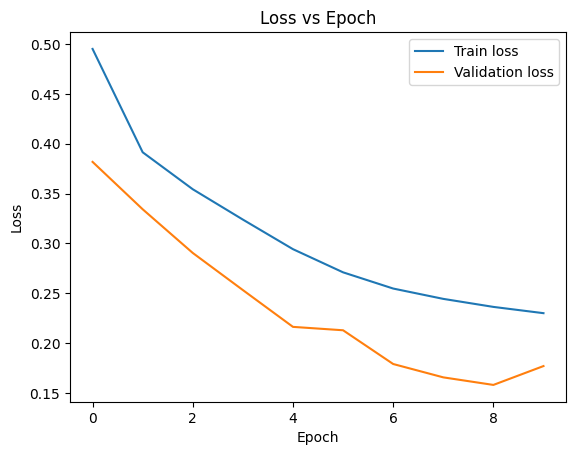

In [22]:
import matplotlib.pyplot as plt

plt.plot(train_loss_list, label = "Train loss")
plt.plot(validation_loss_list, label = "Validation loss")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs Epoch')
plt.legend()
plt.show()

# [예제2](https://blog.naver.com/PostView.naver?blogId=myincizor&logNo=222054097305&categoryNo=6&parentCategoryNo=0&viewDate=&currentPage=1&postListTopCurrentPage=1&from=postView)

## 데이터

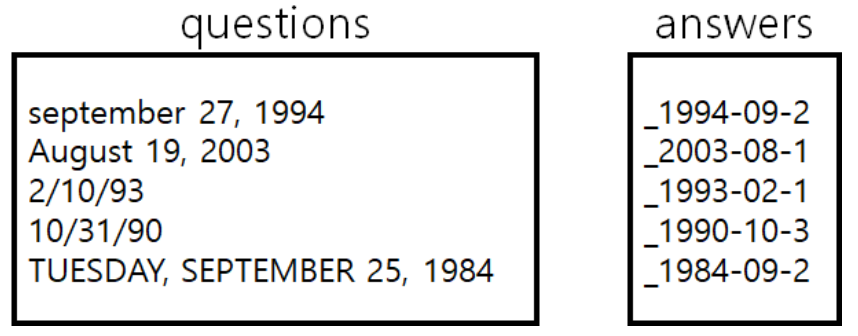

In [23]:
import requests

#《밑바닥부터 시작하는 딥러닝2》역자 깃허브에서 데이터를 가져옵니다.
url = "https://raw.githubusercontent.com/WegraLee/deep-learning-from-scratch-2/master/dataset/date.txt"
r = requests.get(url)

questions, answers = [], []
for line in r.text.strip().split('\n'):
    idx = line.find('_')
    questions.append(line[:idx].strip())
    answers.append(line[idx:].strip())

In [24]:
len(questions), len(answers)

(50000, 50000)

메모리 부족 이슈로 인하여 데이터를 5000개로 줄임

In [25]:
questions = questions[:5000]
answers = answers[:5000]

len(questions), len(answers)

(5000, 5000)

In [26]:
questions[:5]

['september 27, 1994',
 'August 19, 2003',
 '2/10/93',
 '10/31/90',
 'TUESDAY, SEPTEMBER 25, 1984']

In [27]:
answers[:5]

['_1994-09-27', '_2003-08-19', '_1993-02-10', '_1990-10-31', '_1984-09-25']

## 토크나이저

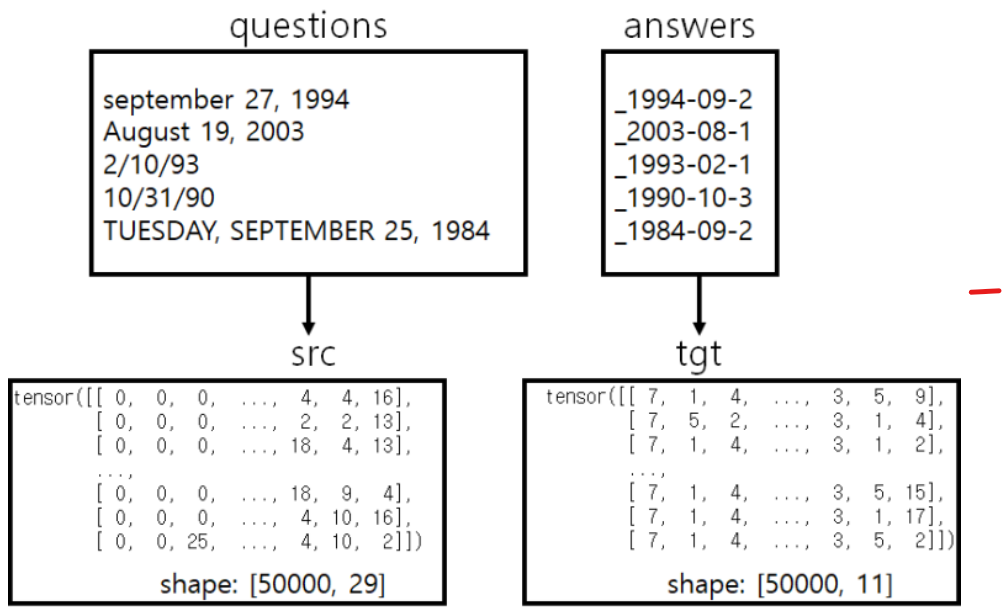

In [28]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

import torch

class TokenizerPlus(Tokenizer):

    def to_tensor(self, texts, **kwargs):
        sequences = self.texts_to_sequences(texts)
        padded = pad_sequences(sequences, **kwargs)
        return torch.tensor(padded, dtype=torch.int64)

    def to_string(self, tensor):
        texts = self.sequences_to_texts(tensor.data.numpy())
        return [t[::2] for t in texts]

In [29]:
# 토큰으로 나눠주고 패딩 처리를 합니다.
tokenizer = TokenizerPlus(char_level=True, filters='')
tokenizer.fit_on_texts(questions)
tokenizer.fit_on_texts(answers)

In [30]:
src = tokenizer.to_tensor(questions)
tgt = tokenizer.to_tensor(answers)

src.shape, tgt.shape

(torch.Size([5000, 29]), torch.Size([5000, 11]))

In [31]:
src[:2]

tensor([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 24, 13, 30, 25, 13, 23, 26,
         13, 15,  6,  5,  9,  7,  6,  1,  4,  4, 14],
        [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 11, 19, 35, 19,
         24, 25,  6,  1,  4,  7,  6,  5,  2,  2, 12]])

In [32]:
tokenizer.to_string(src[:2])

['september 27, 1994', 'august 19, 2003']

In [33]:
tgt[:2]

tensor([[ 8,  1,  4,  4, 14,  3,  2,  4,  3,  5,  9],
        [ 8,  5,  2,  2, 12,  3,  2, 10,  3,  1,  4]])

In [34]:
tokenizer.to_string(tgt[:2])

['_1994-09-27', '_2003-08-19']

## 모델

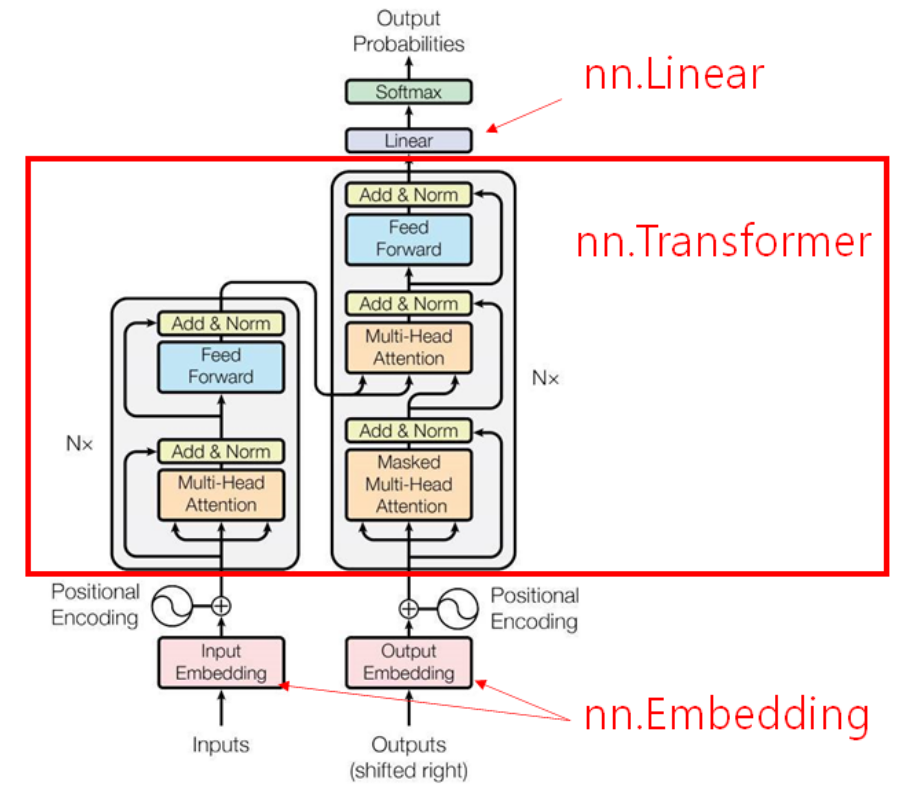

### Positional Encoding
Transformer는 RNN과 다르게 순서를 고려하지 않습니다. 따라서 Positional Encoding을 통해 순서정보를 적용해야 합니다.

In [35]:
import torch
from torch import nn
import math

class PositionalEncoding(nn.Module):

    def __init__(self, d_model, dropout=0.1, max_len=5000):
        super(PositionalEncoding, self).__init__()
        self.dropout = nn.Dropout(p=dropout)

        # Compute the positional encodings once in log space.
        pe = torch.zeros(max_len, d_model)
        position = torch.arange(0, max_len).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, d_model, 2) *
                             -(math.log(10000.0) / d_model))
        pe[:, 0::2] = torch.sin(position * div_term)
        pe[:, 1::2] = torch.cos(position * div_term)
        pe = pe.unsqueeze(0)
        self.register_buffer('pe', pe)

    def forward(self, x):
        x = x + self.pe[:, :x.size(1)]
        return self.dropout(x)

### Transformer Model
-  embbeding_size은 토큰의 임베딩 차원입니다. nhead는 멀티헤드 어텐션에서의 헤드 개수입니다. (embbeding_size / nhead)는 정수가 되도록 설정해줘야 합니다.
- (self.lin.weight = self.emb.weight)선형 변환 층의 가중치를 임베딩 계층의 가중치로 바꿔주었습니다. 이를 가중치 공유라고 합니다.

In [42]:
from torch import nn

class TransformerModel(nn.Module):
    def __init__(self, vocab_size, embbeding_size, nhead, nhid, nlayers):
        super(TransformerModel, self).__init__()
        self.vocab_size = vocab_size
        self.embbeding_size = embbeding_size
        self.nhead = nhead
        self.nhid = nhid
        self.nlayers = nlayers

        self.emb = nn.Embedding(vocab_size, embbeding_size)
        self.pe = PositionalEncoding(embbeding_size)
        self.transformer = nn.Transformer(embbeding_size, nhead,
                                          num_encoder_layers=nlayers,
                                          num_decoder_layers=nlayers,
                                          dim_feedforward=nhid,
                                         )
        self.lin = nn.Linear(embbeding_size, vocab_size)
        self.lin.weight = self.emb.weight # 가중치 공유

    def forward(self, src, tgt, pad_id=0): # src: [batch_size, sequence_size]
        mem, mk = self.encode(src, pad_id)
        return self.decode(tgt, mem, mk, pad_id)

    def encode(self, src, pad_id=0):
        x = self.emb(src) * math.sqrt(self.embbeding_size) # x: [batch_size, sequence_size, embedding_size]
        x = self.pe(x) # 순서(위치) 추가
        mask = (src == pad_id)
        # x.transpose(0, 1): [sequence_size, batch_size, embedding_size]
        memory = self.transformer.encoder(x.transpose(0, 1), src_key_padding_mask=mask)
        return memory, mask

    def decode(self, tgt, memory, memory_mask, pad_id=0):
        x = self.emb(tgt) * math.sqrt(self.embbeding_size) # x: [batch_size, sequence_size, embedding_size]
        x = self.pe(x)

        # generate_square_subsequent_mask: 어텐션이 순서상 뒤에 등장하는 문자를 보지 못하게 만들도록 마스킹 처리를 해야 합니다.
        tgt_mask = self.transformer.generate_square_subsequent_mask(x.size(1))
        # x.transpose(0, 1): [sequence_size, batch_size, embedding_size]
        out = self.transformer.decoder(x.transpose(0, 1), memory,
                                       tgt_mask=tgt_mask,
                                       tgt_key_padding_mask=(tgt == pad_id),
                                       memory_key_padding_mask=memory_mask
                                       )

        return self.lin(out.transpose(0, 1)) # 다시 batch_size를 맨 앞으로 이동

    # 시작 문자열이 주고 10개 시퀀스를 내뱉게 하는 함수입니다. 다음에 올 확률이 가장 높은 문자를 순서대로 10개 뽑아냅니다.
    def greedy_decoding(self, src, start_token):
        N = src.size(0)
        mem, mk = self.encode(src)
        preds = tokenizer.to_tensor([start_token]*N)

        for _ in range(10):
            y_pred = self.decode(preds, mem, mk)
            t_pred = torch.argmax(y_pred[:,-1,:], axis=-1, keepdims=True)
            preds = torch.cat([preds, t_pred], axis=1)

        return tokenizer.to_string(preds[:, 1:])

## 훈련

In [43]:
from torch import optim
from torch.utils.data import TensorDataset, DataLoader

import numpy as np
from tqdm.auto import tqdm

class Trainer:
    def __init__(self, model, loss_fn, optimizer, pad_id=0, start_token='_'):
        self.model = model
        self.loss_fn = loss_fn
        self.optimizer = optimizer
        self.pad_id = pad_id
        self.start_token = start_token
        self.losses = []
        self.current_epoch = 0

    def train(self, src, tgt, max_epoch=1, batch_size=128): # 128, 64, 32
        X1_train = src
        X2_train = tgt[:, :-1]
        y_train = tgt[:, 1:]
        ds = TensorDataset(X1_train, X2_train, y_train)
        loader = DataLoader(ds, batch_size=batch_size, shuffle=True)

        for epoch in tqdm(range(1, max_epoch+1)):
            self.model.train()
            running_loss = 0
            self.current_epoch += 1
            print("EPOCH: %s :: " %self.current_epoch, end='')
            for i, (x1, x2, yy) in enumerate(loader):
                y_pred = self.model(x1, x2, self.pad_id)
                loss = self.loss_fn(y_pred.view(-1, y_pred.size(-1)), yy.view(-1))
                self.optimizer.zero_grad()
                loss.backward()
                self.optimizer.step()
                running_loss += loss.item()

            self.model.eval()
            running_loss = round(running_loss / (i+1), 3)
            self.losses.append(running_loss)
            acc = self.evaluate(src, y_train)
            print("Loss: %s" %(running_loss), "ACC: %s" %acc)

    def evaluate(self, src, y):
        pred = np.array(self.model.greedy_decoding(src, start_token='_'))
        y_text = np.array(tokenizer.to_string(y))
        acc = (pred == y_text).sum() / y_text.size
        return acc

In [44]:
model = TransformerModel(vocab_size=len(tokenizer.word_index)+1, # 보통 embbeding_size는 총 토큰 수 + 1
                         embbeding_size=64, nhead=4,
                         nhid=256, nlayers=2)
for p in model.parameters():
    if p.dim() > 1:
        nn.init.xavier_uniform_(p)

loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters())

trainer = Trainer(model, loss_fn, optimizer)
trainer.train(src, tgt, max_epoch=10)

  0%|          | 0/10 [00:00<?, ?it/s]

EPOCH: 1 :: 

/usr/local/lib/python3.10/dist-packages/torch/nn/functional.py:4999: UserWarning: Support for mismatched key_padding_mask and attn_mask is deprecated. Use same type for both instead.
  warnings.warn(


Loss: 1.909 ACC: 0.0002
EPOCH: 2 :: Loss: 1.073 ACC: 0.01
EPOCH: 3 :: Loss: 0.774 ACC: 0.0924
EPOCH: 4 :: Loss: 0.508 ACC: 0.6202
EPOCH: 5 :: Loss: 0.261 ACC: 0.7908
EPOCH: 6 :: Loss: 0.154 ACC: 0.8684
EPOCH: 7 :: Loss: 0.109 ACC: 0.9816
EPOCH: 8 :: Loss: 0.085 ACC: 0.984
EPOCH: 9 :: Loss: 0.07 ACC: 0.9886
EPOCH: 10 :: Loss: 0.052 ACC: 0.9778


# [예제3](https://tutorials.pytorch.kr/beginner/transformer_tutorial.html)

## 1.모델 정의하기

In [45]:
import math
from typing import Tuple

import torch
from torch import nn, Tensor
import torch.nn.functional as F
from torch.nn import TransformerEncoder, TransformerEncoderLayer
from torch.utils.data import dataset

`PositionalEncoding` 모듈은 시퀀스 안에서 토큰의 상대적인 또는 절대적인 포지션에 대한 어떤 정보를 주입합니다. 포지셔널 인코딩은 임베딩과 합칠 수 있도록 똑같은 차원을 가집니다. 여기에서, 우리는 다른 주파수(frequency)의 `sine`과 `cosine` 함수를 사용합니다.

In [46]:
class PositionalEncoding(nn.Module):

    def __init__(self, d_model: int, dropout: float = 0.1, max_len: int = 5000):
        super().__init__()
        self.dropout = nn.Dropout(p=dropout)

        position = torch.arange(max_len).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, d_model, 2) * (-math.log(10000.0) / d_model))
        pe = torch.zeros(max_len, 1, d_model)
        pe[:, 0, 0::2] = torch.sin(position * div_term)
        pe[:, 0, 1::2] = torch.cos(position * div_term)
        self.register_buffer('pe', pe)

    def forward(self, x: Tensor) -> Tensor:
        """
        Args:
            x: Tensor, shape [seq_len, batch_size, embedding_dim]
        """
        x = x + self.pe[:x.size(0)]
        return self.dropout(x)

`nn.TransformerEncoder` 는 여러 개의 `nn.TransformerEncoderLayer` 레이어로 구성되어 있습니다.     
`nn.TransformerEncoder` 내부의 `self-attention` 레이어들은 시퀀스 안에서의 이전 포지션에만 집중하도록 허용되기 때문에, 입력(input) 순서와 함께, 정사각 형태의 어텐션 마스크(attention mask) 가 필요합니다.       
언어 모델링 과제를 위해서, 미래의 포지션에 있는 모든 토큰들은 마스킹 되어야(가려져야) 합니다. 실제 단어를 얻기 위해서, `nn.TransformerEncoder` 의 출력은 로그-소프트맥스(log-Softmax) 로 이어지는 최종 선형(Linear) 레이어로 전달 됩니다.

In [47]:
class TransformerModel(nn.Module):

    def __init__(self, ntoken: int, d_model: int, nhead: int, d_hid: int,
                nlayers: int, dropout: float = 0.5):
        super().__init__()
        self.model_type = 'Transformer'
        self.pos_encoder = PositionalEncoding(d_model, dropout)
        encoder_layers = TransformerEncoderLayer(d_model, nhead, d_hid, dropout)
        self.transformer_encoder = TransformerEncoder(encoder_layers, nlayers)
        self.encoder = nn.Embedding(ntoken, d_model)
        self.d_model = d_model
        self.decoder = nn.Linear(d_model, ntoken)

        self.init_weights()

    def init_weights(self) -> None:
        initrange = 0.1
        self.encoder.weight.data.uniform_(-initrange, initrange)
        self.decoder.bias.data.zero_()
        self.decoder.weight.data.uniform_(-initrange, initrange)

    def forward(self, src: Tensor, src_mask: Tensor) -> Tensor:
        """
        Args:
            src: Tensor, shape [seq_len, batch_size]
            src_mask: Tensor, shape [seq_len, seq_len]

        Returns:
            output Tensor of shape [seq_len, batch_size, ntoken]
        """
        src = self.encoder(src) * math.sqrt(self.d_model)
        src = self.pos_encoder(src)
        output = self.transformer_encoder(src, src_mask)
        output = self.decoder(output)
        return output


def generate_square_subsequent_mask(sz: int) -> Tensor:
    """Generates an upper-triangular matrix of -inf, with zeros on diag."""
    return torch.triu(torch.ones(sz, sz) * float('-inf'), diagonal=1)

## 2.데이터 로드하고 배치 만들기

어휘(vocab) 객체는 훈련 데이터셋(train dataset)에 의하여 만들어지고, 토큰(token)을 텐서(tensor)로 수치화하는데 사용됩니다.    
Wikitext2에서 보기 드믄 토큰(rare token)은 `<unk>`로 표현됩니다.     
  
주어진 1D 벡터의 시퀀스 데이터에서, `batchify()` 함수는 데이터를 `batch_size` 컬럼들로 정렬합니다. 만약 데이터가 `batch_size` 컬럼으로 나누어 떨어지지 않으면, 데이터를 잘라내서 맞춥니다.    
예를 들어 (총 길이 26의) 알파벳을 데이터로 보고 `batch_size=4` 일 때, 알파벳은 길이가 6인 4개의 시퀀스로 나눠집니다.

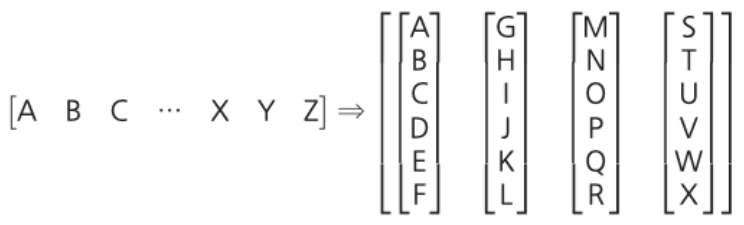

배치 작업은 더 많은 병렬 처리를 가능하게 하지만, 모델이 독립적으로 각 컬럼들을 취급해야 함을 뜻합니다.       
예를 들어, 위 예제에서 `G`와 `F`의 의존성(dependance)은 학습되지 않습니다.

In [48]:
from torchtext.datasets import WikiText2
from torchtext.data.utils import get_tokenizer
from torchtext.vocab import build_vocab_from_iterator

In [49]:
!pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.2/486.2 kB 24.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 17.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 27.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 20.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 28.7 MB/s eta 0:00:00


In [50]:
from datasets import load_dataset

datasets = load_dataset('wikitext', 'wikitext-2-raw-v1')

Generating test split:   0%|          | 0/4358 [00:00<?, ? examples/s]

Generating train split:   0%|          | 0/36718 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/3760 [00:00<?, ? examples/s]

Dataset wikitext downloaded and prepared to /root/.cache/huggingface/datasets/wikitext/wikitext-2-raw-v1/1.0.0/a241db52902eaf2c6aa732210bead40c090019a499ceb13bcbfa3f8ab646a126. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

In [51]:
datasets.keys()

dict_keys(['test', 'train', 'validation'])

In [52]:
datasets["train"][10]

{'text': ' The game \'s battle system , the BliTZ system , is carried over directly from Valkyira Chronicles . During missions , players select each unit using a top @-@ down perspective of the battlefield map : once a character is selected , the player moves the character around the battlefield in third @-@ person . A character can only act once per @-@ turn , but characters can be granted multiple turns at the expense of other characters \' turns . Each character has a field and distance of movement limited by their Action Gauge . Up to nine characters can be assigned to a single mission . During gameplay , characters will call out if something happens to them , such as their health points ( HP ) getting low or being knocked out by enemy attacks . Each character has specific " Potentials " , skills unique to each character . They are divided into " Personal Potential " , which are innate skills that remain unaltered unless otherwise dictated by the story and can either help or impede

In [53]:
tokenizer = get_tokenizer('basic_english')

In [54]:
from tqdm.auto import tqdm

def iter_data(data):
    for text in tqdm(data):
        yield text['text']

In [55]:
train_iter = iter_data(datasets["train"])
vocab = build_vocab_from_iterator(map(tokenizer, train_iter), specials=['<unk>'])
vocab.set_default_index(vocab['<unk>'])

len(vocab)

  0%|          | 0/36718 [00:00<?, ?it/s]

66058

In [56]:
def data_process(raw_text_iter: dataset.IterableDataset) -> Tensor:
    """Converts raw text into a flat Tensor."""
    data = [torch.tensor(vocab(tokenizer(item)), dtype=torch.long) for item in raw_text_iter]
    return torch.cat(tuple(filter(lambda t: t.numel() > 0, data)))

# train_iter was "consumed" by the process of building the vocab,
# so we have to create it again
train_iter = iter_data(datasets["train"])
val_iter = iter_data(datasets["validation"])
test_iter = iter_data(datasets["test"])
train_data = data_process(train_iter)
val_data = data_process(val_iter)
test_data = data_process(test_iter)

  0%|          | 0/36718 [00:00<?, ?it/s]

  0%|          | 0/3760 [00:00<?, ?it/s]

  0%|          | 0/4358 [00:00<?, ?it/s]

In [57]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [58]:
def batchify(data: Tensor, bsz: int) -> Tensor:
    """Divides the data into bsz separate sequences, removing extra elements
    that wouldn't cleanly fit.

    Args:
        data: Tensor, shape [N]
        bsz: int, batch size

    Returns:
        Tensor of shape [N // bsz, bsz]
    """
    seq_len = data.size(0) // bsz
    data = data[:seq_len * bsz]
    data = data.view(bsz, seq_len).t().contiguous()
    return data.to(device)

batch_size = 20
eval_batch_size = 10
train_data = batchify(train_data, batch_size)  # shape [seq_len, batch_size]
val_data = batchify(val_data, eval_batch_size)
test_data = batchify(test_data, eval_batch_size)

### 입력(input)과 타겟(target) 시퀀스를 생성하기 위한 함수들

`get_batch()`는 트랜스포머 모델을 위한 입력-타겟 시퀀스 쌍(pair)을 생성합니다.

In [59]:
bptt = 35
def get_batch(source: Tensor, i: int) -> Tuple[Tensor, Tensor]:
    """
    Args:
        source: Tensor, shape [full_seq_len, batch_size]
        i: int

    Returns:
        tuple (data, target), where data has shape [seq_len, batch_size] and
        target has shape [seq_len * batch_size]
    """
    seq_len = min(bptt, len(source) - 1 - i)
    data = source[i:i+seq_len]
    target = source[i+1:i+1+seq_len].reshape(-1)
    return data, target

## 3.인스턴스 초기화

In [60]:
ntokens = len(vocab) # 단어 사전(어휘집)의 크기
emsize = 200 # 임베딩 차원
d_hid = 200 # nn.TransformerEncoder 에서 피드포워드 네트워크(feedforward network) 모델의 차원
nlayers = 2 # nn.TransformerEncoder 내부의 nn.TransformerEncoderLayer 개수
nhead = 2 # nn.MultiheadAttention의 헤드 개수
dropout = 0.2 # 드랍아웃(dropout) 확률
model = TransformerModel(ntokens, emsize, nhead, d_hid, nlayers, dropout).to(device)

## 4.모델 실행

- `scheduler`: [torch.optim.lr_scheduler.StepLR()](https://gaussian37.github.io/dl-pytorch-lr_scheduler/#steplr-1)
> 일정한 Step마다 Learning rate에 gamma를 곱해주는 방식입니다.

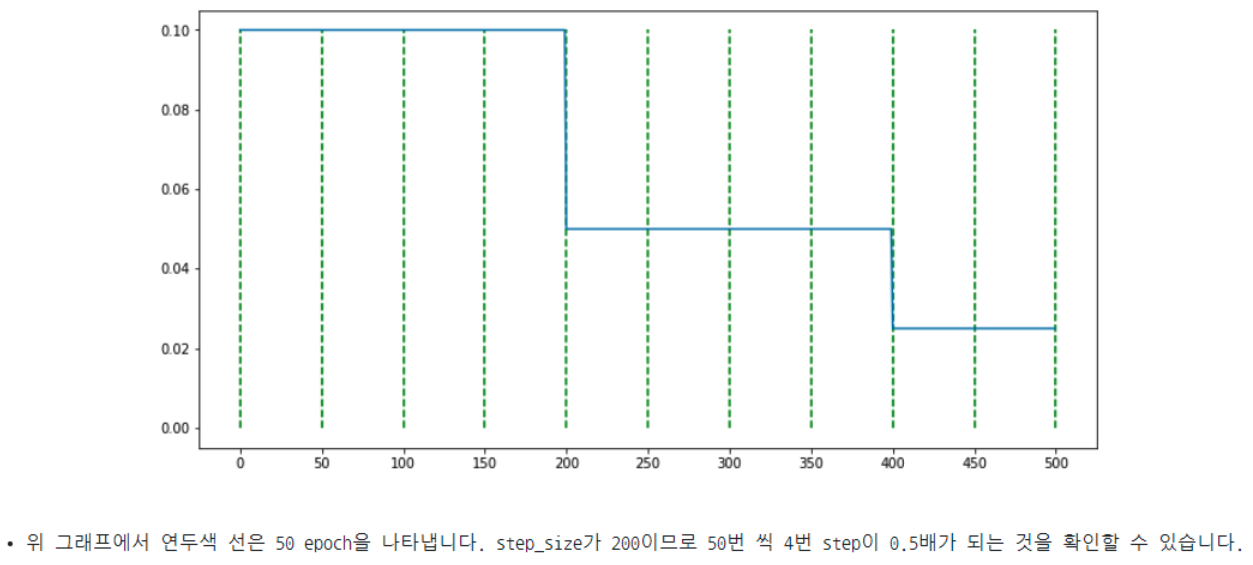

In [61]:
import copy
import time

criterion = nn.CrossEntropyLoss()
lr = 5.0  # 학습률(learning rate)
optimizer = torch.optim.SGD(model.parameters(), lr=lr)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, 1.0, gamma=0.95)

### [Gradient clipping](https://sanghyu.tistory.com/87)
주로 RNN계열에서 gradient vanishing이나 gradient exploding이 많이 발생하는데, gradient exploding을 방지하여 학습의 안정화를 도모하기 위해 사용하는 방법이다.

In [62]:
def train(model: nn.Module) -> None:
    model.train()  # 학습 모드 시작
    total_loss = 0.
    log_interval = 200
    start_time = time.time()
    src_mask = generate_square_subsequent_mask(bptt).to(device)

    num_batches = len(train_data) // bptt
    for batch, i in enumerate(range(0, train_data.size(0) - 1, bptt)):
        data, targets = get_batch(train_data, i)
        seq_len = data.size(0)
        if seq_len != bptt:  # 마지막 배치에만 적용
            src_mask = src_mask[:seq_len, :seq_len]
        output = model(data, src_mask)
        loss = criterion(output.view(-1, ntokens), targets)

        optimizer.zero_grad()
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), 0.5) # Gradient clipping
        optimizer.step()

        total_loss += loss.item()
        if batch % log_interval == 0 and batch > 0:
            lr = scheduler.get_last_lr()[0]
            ms_per_batch = (time.time() - start_time) * 1000 / log_interval
            cur_loss = total_loss / log_interval
            ppl = math.exp(cur_loss)
            print(
                f'| epoch {epoch:3d} | {batch:5d}/{num_batches:5d} batches | '
                f'lr {lr:02.2f} | ms/batch {ms_per_batch:5.2f} | '
                f'loss {cur_loss:5.2f} | ppl {ppl:8.2f}')
            total_loss = 0
            start_time = time.time()

In [63]:
def evaluate(model: nn.Module, eval_data: Tensor) -> float:
    model.eval()  # 평가 모드 시작
    total_loss = 0.
    src_mask = generate_square_subsequent_mask(bptt).to(device)
    with torch.no_grad():
        for i in range(0, eval_data.size(0) - 1, bptt):
            data, targets = get_batch(eval_data, i)
            seq_len = data.size(0)
            if seq_len != bptt:
                src_mask = src_mask[:seq_len, :seq_len]
            output = model(data, src_mask)
            output_flat = output.view(-1, ntokens)
            total_loss += seq_len * criterion(output_flat, targets).item()
    return total_loss / (len(eval_data) - 1)

에포크 내에서 반복됩니다. 만약 검증 오차(validation loss)가 우리가 지금까지 관찰한 것 중 최적이라면 모델을 저장합니다.   
매 에포크 이후에 학습률을 조절합니다.

In [64]:
best_val_loss = float('inf')
epochs = 3
best_model = None

for epoch in tqdm(range(1, epochs + 1)):
    epoch_start_time = time.time()
    train(model)
    val_loss = evaluate(model, val_data)
    val_ppl = math.exp(val_loss)
    elapsed = time.time() - epoch_start_time
    print('-' * 89)
    print(

        f'| end of epoch {epoch:3d} | time: {elapsed:5.2f}s | '
        f'valid loss {val_loss:5.2f} | valid ppl {val_ppl:8.2f}')
    print('-' * 89)

    if val_loss < best_val_loss:
        best_val_loss = val_loss
        best_model = copy.deepcopy(model)

    scheduler.step()


  0%|          | 0/3 [00:00<?, ?it/s]

| epoch   1 |   200/ 2930 batches | lr 5.00 | ms/batch 27.04 | loss  8.83 | ppl  6814.99
| epoch   1 |   400/ 2930 batches | lr 5.00 | ms/batch 26.63 | loss  7.42 | ppl  1669.11
| epoch   1 |   600/ 2930 batches | lr 5.00 | ms/batch 26.98 | loss  6.89 | ppl   985.37
| epoch   1 |   800/ 2930 batches | lr 5.00 | ms/batch 26.84 | loss  6.74 | ppl   846.78
| epoch   1 |  1000/ 2930 batches | lr 5.00 | ms/batch 26.89 | loss  6.53 | ppl   688.27
| epoch   1 |  1200/ 2930 batches | lr 5.00 | ms/batch 27.02 | loss  6.54 | ppl   691.16
| epoch   1 |  1400/ 2930 batches | lr 5.00 | ms/batch 27.02 | loss  6.52 | ppl   679.22
| epoch   1 |  1600/ 2930 batches | lr 5.00 | ms/batch 27.05 | loss  6.50 | ppl   667.37
| epoch   1 |  1800/ 2930 batches | lr 5.00 | ms/batch 27.30 | loss  6.36 | ppl   576.81
| epoch   1 |  2000/ 2930 batches | lr 5.00 | ms/batch 27.80 | loss  6.37 | ppl   584.23
| epoch   1 |  2200/ 2930 batches | lr 5.00 | ms/batch 27.83 | loss  6.24 | ppl   514.06
| epoch   1 |  2400/ 

## 5.평가 데이터셋으로 모델 평가

In [65]:
test_loss = evaluate(best_model, test_data)
test_ppl = math.exp(test_loss)
print('=' * 89)
print(
    f'| End of training | test loss {test_loss:5.2f} | '
    f'test ppl {test_ppl:8.2f}')
print('=' * 89)

| End of training | test loss  6.16 | test ppl   475.33
